

Olá estudante!

Me chamo Rafael Meirelles e irei revisar o seu projeto hoje e em eventuais futuras submissões até que ele cumpra todos os requisitos para o aceite.
Conte comigo nessa jornada e não se preocupe se precisar ajustar alguns detalhes, é parte do processo e fundamental para que você exercite os conceitos que vem aprendendo e assim melhore a qualidade dos seus códigos e análises.

**Peço que mantenha e não altereos comentários que eu fizer por aqui para que possamos nos localizar posteriormente, ok?**

Mais uma coisa, vamos utilizar um código de cores para você entender os meus feedbacks no seu notebook. Funciona assim:


<div class="alert alert-danger">
<strong>Vermelho</strong>

Erro que precisa ser consertado, caso contrário, seu projeto não pode ser aceito

</div>

<div class="alert alert-warning">
<strong>Amarelo</strong>

Alerta de um erro não crítco, mas que pode ser corrigido para melhoria geral no seu código/análise

</div>

<div class="alert alert-success">
<strong>Verde</strong>

Elogios
</div>

<div class="alert alert-info">
<strong>Comentário do estudante</strong>

Use uma caixa azul como essa para eventuais comentários que você gostaria de fazer para mim.
</div>









<div class="alert alert-danger">
<strong>Comentário do revisor v1</strong>

Estamos no caminho certo com essa versão, mas retocar os pontos indicados abaixo nos fará chegar em um resultado ainda mais incrível.
    
Conte comigo para ajudá-lo (a) em qualquer questão que possa vir a ter! Lembre-se de usar as caixas azuis para se comunicar comigo.
    
Até breve.
</div>

<div class="alert alert-danger">
<strong>Comentário do revisor v2</strong>

Avançamos bastante com os ajustes, mas ainda temos alguns pontos pendentes. Procure por 'v2' para encontrá-los com mais facilidade.

Estamos quase lá! Vamos juntos até o fim.
</div>



<div class="alert alert-danger">
<strong>Comentário do revisor v3</strong>

Avançamos bem nessa iteração! Muito bom!
    
Estamos quase lá! Foque por favor nos pontos indicados como v2 e chegaremos a aprovação.
    
Até breve!
</div>



# Análise de Vendas e Classificações de Jogos

Este notebook tem como objetivo analisar dados de vendas de jogos e suas classificações em diferentes plataformas e gêneros. Vamos explorar hipóteses sobre as avaliações dos usuários, vendas por plataforma, e preferências regionais.

## Sumário
1. Introdução aos Dados
2. Preparação dos Dados
3. Análise de Plataformas e Vendas
4. Teste de Hipóteses
5. Conclusões

## Introdução aos Dados

Nesta etapa, carregamos o arquivo `games.csv` e exploramos suas informações gerais. O dataset inclui colunas como `name`, `platform`, `year_of_release`, `genre`, `user_score`, e vendas regionais.

### Objetivo
- Entender as características dos dados e verificar a integridade (valores ausentes, tipos de dados).

In [23]:
import pandas as pd
import plotly.express as px
import numpy as np
import seaborn as sns
from math import factorial
from scipy import stats
from matplotlib import pyplot as plt

In [24]:
games_df = pd.read_csv('/datasets/games.csv')

In [25]:
games_df.info()
print()
games_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB



,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


##  Preparação dos Dados

Nesta seção, preparamos os dados para análise:
- **Transformação dos nomes das colunas**: Convertendo para minúsculas para consistência.
- **Conversão de tipos de dados**: Ajustamos tipos de colunas como `year_of_release` e `user_score` para numéricos.
- **Tratamento de valores ausentes**: Decidimos como lidar com valores ausentes e abordamos casos como 'TBD' nas avaliações dos usuários.

### Justificativa
- A padronização e a correção dos tipos de dados são essenciais para a análise correta.

In [26]:
# Renomear as colunas para minúsculas
games_df.columns = games_df.columns.str.lower()

# Exibir as colunas renomeadas
games_df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [27]:
#As colunas foram renomeadas com sucesso para letras minúsculas. 
# Vou agora analisar as conversões necessárias e preparar o tratamento dos valores ausentes.

In [28]:
# Substituir 'TBD' por NaN na coluna 'user_score'
games_df['user_score'] = games_df['user_score'].replace('tbd', pd.NA)

# Converter 'year_of_release' para int (se possível) e 'user_score' para float
games_df['year_of_release'] = games_df['year_of_release'].dropna().astype(int)
games_df['user_score'] = pd.to_numeric(games_df['user_score'], errors='coerce')

# Descrever as colunas onde os tipos de dados foram alterados
games_df.dtypes

name                object
platform            object
year_of_release    float64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score         float64
rating              object
dtype: object

In [29]:
#Ha um problema com a conversão de year_of_release para int, pois ainda está como float64. 
# Isso sugere que há valores ausentes que não foram tratados adequadamente antes da conversão.
#Vou primeiro tratar os valores ausentes em year_of_release e depois finalizar a conversão.

In [30]:
games_df['year_of_release'] = games_df['year_of_release'].fillna(games_df['year_of_release'].mean())

In [31]:
# Criar novas colunas preenchidas com a média global para 'critic_score' e 'user_score'
games_df['critic_score_filled'] = games_df['critic_score'].fillna(games_df['critic_score'].mean())
games_df['user_score_filled'] = games_df['user_score'].fillna(games_df['user_score'].mean())

# Para a coluna 'rating', podemos preencher os valores ausentes com a moda diretamente, pois ela é categórica
games_df['rating'] = games_df['rating'].fillna(games_df['rating'].mode()[0])

# Verificando valores ausentes nas colunas originais e preenchidas
print("Valores ausentes em 'critic_score':", games_df['critic_score'].isna().sum())
print("Valores ausentes em 'critic_score_filled':", games_df['critic_score_filled'].isna().sum())
print("Valores ausentes em 'user_score':", games_df['user_score'].isna().sum())
print("Valores ausentes em 'user_score_filled':", games_df['user_score_filled'].isna().sum())
print("Valores ausentes finais em 'rating':", games_df['rating'].isna().sum())

Valores ausentes em 'critic_score': 8578
Valores ausentes em 'critic_score_filled': 0
Valores ausentes em 'user_score': 9125
Valores ausentes em 'user_score_filled': 0
Valores ausentes finais em 'rating': 0


In [32]:
# Tratar valores ausentes em 'year_of_release' substituindo-os por NaN
games_df['year_of_release'] = games_df['year_of_release'].fillna(-1).astype(int)
games_df['year_of_release'] = games_df['year_of_release'].replace(-1, pd.NA)

# Criar a coluna 'total_sales' somando as vendas regionais
games_df['total_sales'] = games_df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

# Verificar as alterações
games_df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,critic_score_filled,user_score_filled,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,76.000000,8.000000,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,E,68.967679,7.125046,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,82.000000,8.300000,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,80.000000,8.000000,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,E,68.967679,7.125046,31.38


<div class="alert alert-danger">
<strong>Comentário do revisor v1</strong>

Cabral, creio que podemos estressar um pouquinho mais os missings de ano de lançamento.
    
O que acha de verificar os jogos que possuem essa informação de lançamento e outra plataforma e para os demais trabalhar com a substuição por um valor que faça sentido de acordo com os lançamentos gerais da respectiva plataforma?

Além disso não é recomendável substituir os valores nas colunas de avaliações pois iremos fazer análises mais adiante que podem acabar viesadas... Aconselho manter os missings dessas colunas.
    
Além disso, o que pensa sobre os missings das outras colunas?
</div>


<div class="alert alert-danger">
<strong>Comentário do revisor v2</strong>

O ponto acima ficou pendente.
</div>

<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

Bom trabalho calculando as vendas totais.
    
</div>

##  Preparação dos Dados

Nesta seção, preparamos os dados para análise:
- **Transformação dos nomes das colunas**: Convertendo para minúsculas para consistência.
- **Conversão de tipos de dados**: Ajustamos tipos de colunas como `year_of_release` e `user_score` para numéricos.
- **Tratamento de valores ausentes**: Decidimos como lidar com valores ausentes e abordamos casos como 'TBD' nas avaliações dos usuários.

### Justificativa
- A padronização e a correção dos tipos de dados são essenciais para a análise correta.

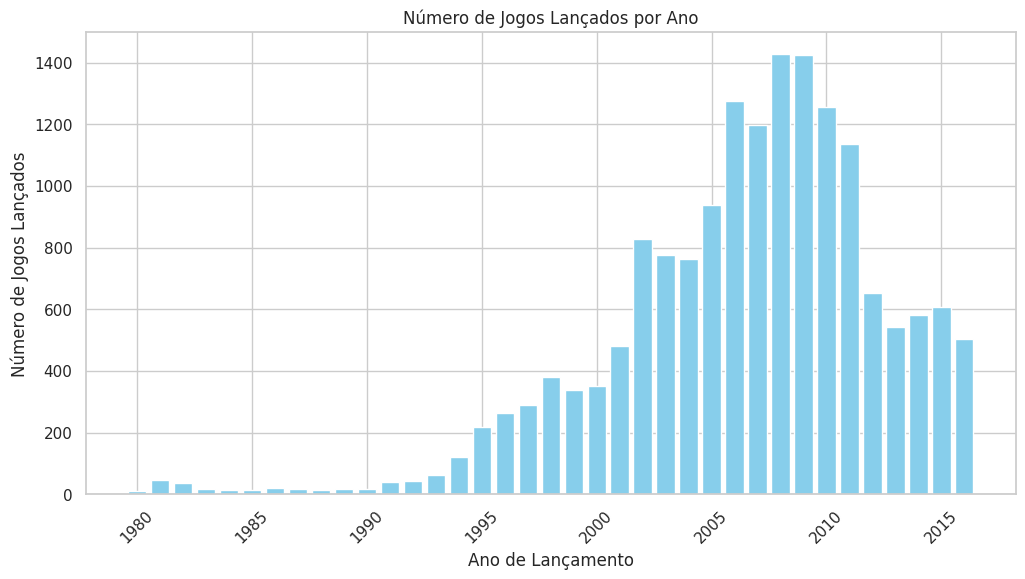

In [33]:
# Contar quantos jogos foram lançados em cada ano
yearly_release_count = games_df['year_of_release'].value_counts().sort_index()

# Mostrar a contagem de lançamentos por ano
yearly_release_count

# Contar quantos jogos foram lançados em cada ano
yearly_release_count = games_df['year_of_release'].value_counts().sort_index()

# Plotar a contagem de lançamentos por ano
plt.figure(figsize=(12, 6))
plt.bar(yearly_release_count.index, yearly_release_count.values, color='skyblue')
plt.xlabel('Ano de Lançamento')
plt.ylabel('Número de Jogos Lançados')
plt.title('Número de Jogos Lançados por Ano')
plt.xticks(rotation=45)
plt.show()


In [34]:
#os dados são significativos sim, tendo bem vista que a partir do ano 1994 começou a haver mais lançamentos
#quase o dobro dos anos anteriores

<div class="alert alert-danger">
<strong>Comentário do revisor v1</strong>

Um plot seria importante nessa sessão para ilustrar os resultados.
</div>

<div class="alert alert-success">
<strong>Comentário do revisor v2</strong>

Valeu pelo ajuste!
</div>

##  Análise de Plataformas e Vendas

### Variação de Vendas por Plataforma
Exploramos as vendas totais por plataforma e analisamos como elas se comportaram ao longo dos anos. Identificamos plataformas líderes em vendas e examinamos tendências de crescimento ou declínio.

### Visualizações
- Diagramas de linha para vendas anuais por plataforma.
- Diagramas de caixa para distribuição de vendas por plataforma.

**Conclusões**: Identificamos que certas plataformas, como PlayStation e Xbox, lideram em vendas em diferentes períodos, enquanto outras, como Wii, perderam popularidade ao longo do tempo.

In [35]:
# Escolhendo as 5 plataformas mais populares
platform_sales = games_df.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
top_platforms = platform_sales.head(5).index  

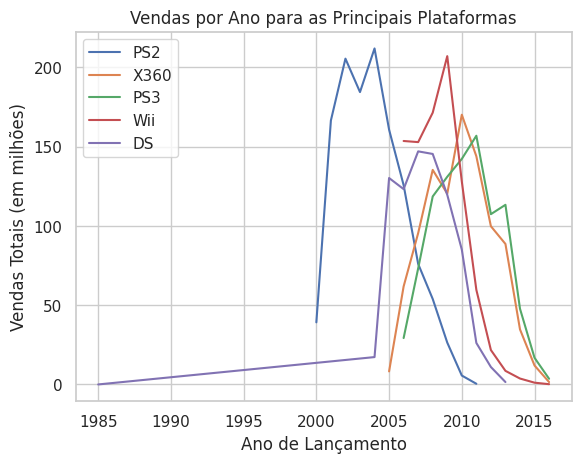

In [36]:
#Calcule as vendas totais por plataforma
%matplotlib inline

# Filtrar dados para as plataformas mais populares
top_platforms_data = games_df[games_df['platform'].isin(top_platforms)]

# Criar um gráfico de barras empilhado para ver a variação anual
for platform in top_platforms:
    yearly_sales = top_platforms_data[top_platforms_data['platform'] == platform].groupby('year_of_release')['total_sales'].sum()
    plt.plot(yearly_sales.index, yearly_sales.values, label=platform)

plt.xlabel('Ano de Lançamento')
plt.ylabel('Vendas Totais (em milhões)')
plt.title('Vendas por Ano para as Principais Plataformas')
plt.legend()
plt.show()


In [37]:
#Identificando plataformas que perderam popularidade
last_year_sales = top_platforms_data.groupby('platform')['year_of_release'].max()
print("Últimos anos de vendas por plataforma:\n", last_year_sales)

Últimos anos de vendas por plataforma:
 platform
DS      2013
PS2     2011
PS3     2016
Wii     2016
X360    2016
Name: year_of_release, dtype: int64


<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

Principais plataformas investigadas.    
</div>

In [38]:
#De acordo com o grafico os dados começaram a ser promissores a partir do ano 2005

In [39]:
# Defina um período de anos recentes para análise, por exemplo, de 2005 a 2016
relevant_data = games_df[(games_df['year_of_release'] >= 2005) & (games_df['year_of_release'] <= 2016)]


<div class="alert alert-danger">
<strong>Comentário do revisor v1</strong>

Cabral, aqui sua decisão deveria ser pautada pelos dados úteis tendo em vista prever o que acontecerá em 2017. Sendo assim os dados de 2000 Me parecem um pouco distantes para serem utilizados. O que acha de rever essa decisão e depois retomamos daqui?
</div>

<div class="alert alert-success">
<strong>Comentário do revisor v2</strong>

Valeu pelo ajuste!
</div>

In [40]:
# Filtrar os dados para o período de 2005 a 2016
relevant_data = games_df[(games_df['year_of_release'] >= 2005) & (games_df['year_of_release'] <= 2016)]

# Verificar os dados filtrados
relevant_data.info()
relevant_data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11541 entries, 0 to 16714
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   name                 11541 non-null  object 
 1   platform             11541 non-null  object 
 2   year_of_release      11541 non-null  int64  
 3   genre                11541 non-null  object 
 4   na_sales             11541 non-null  float64
 5   eu_sales             11541 non-null  float64
 6   jp_sales             11541 non-null  float64
 7   other_sales          11541 non-null  float64
 8   critic_score         5799 non-null   float64
 9   user_score           5665 non-null   float64
 10  rating               11541 non-null  object 
 11  critic_score_filled  11541 non-null  float64
 12  user_score_filled    11541 non-null  float64
 13  total_sales          11541 non-null  float64
dtypes: float64(9), int64(1), object(4)
memory usage: 1.3+ MB


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,critic_score_filled,user_score_filled,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,76.0,8.0,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,82.0,8.3,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,80.0,8.0,32.77
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,89.0,8.5,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,58.0,6.6,28.91


Vendas totais por plataforma:
 platform
X360    971.42
PS3     939.65
Wii     907.51
DS      788.83
PS2     448.67
PS4     314.14
PSP     286.99
3DS     259.00
PC      171.55
XOne    159.32
WiiU     82.19
XB       66.02
PSV      54.07
GBA      47.51
GC       41.35
2600     10.50
PS        3.28
GB        1.03
N64       0.67
DC        0.06
Name: total_sales, dtype: float64


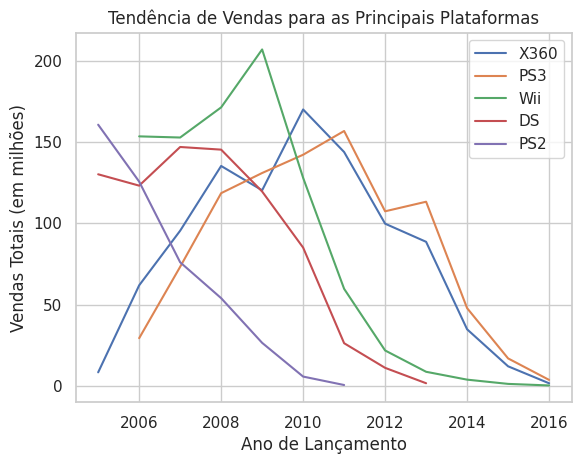

In [41]:
# Calcular as vendas totais por plataforma
platform_sales = relevant_data.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

# Exibir as plataformas com maiores vendas totais
print("Vendas totais por plataforma:\n", platform_sales)

# Analisar a tendência de vendas ao longo dos anos para as principais plataformas
import matplotlib.pyplot as plt

top_platforms = platform_sales.head(5).index  # Escolha as 5 principais plataformas

for platform in top_platforms:
    yearly_sales = relevant_data[relevant_data['platform'] == platform].groupby('year_of_release')['total_sales'].sum()
    plt.plot(yearly_sales.index, yearly_sales.values, label=platform)

plt.xlabel('Ano de Lançamento')
plt.ylabel('Vendas Totais (em milhões)')
plt.title('Tendência de Vendas para as Principais Plataformas')
plt.legend()
plt.show()

<div class="alert alert-success">
<strong>Comentário do revisor v2</strong>

Principais plataformas investigadas.
</div>

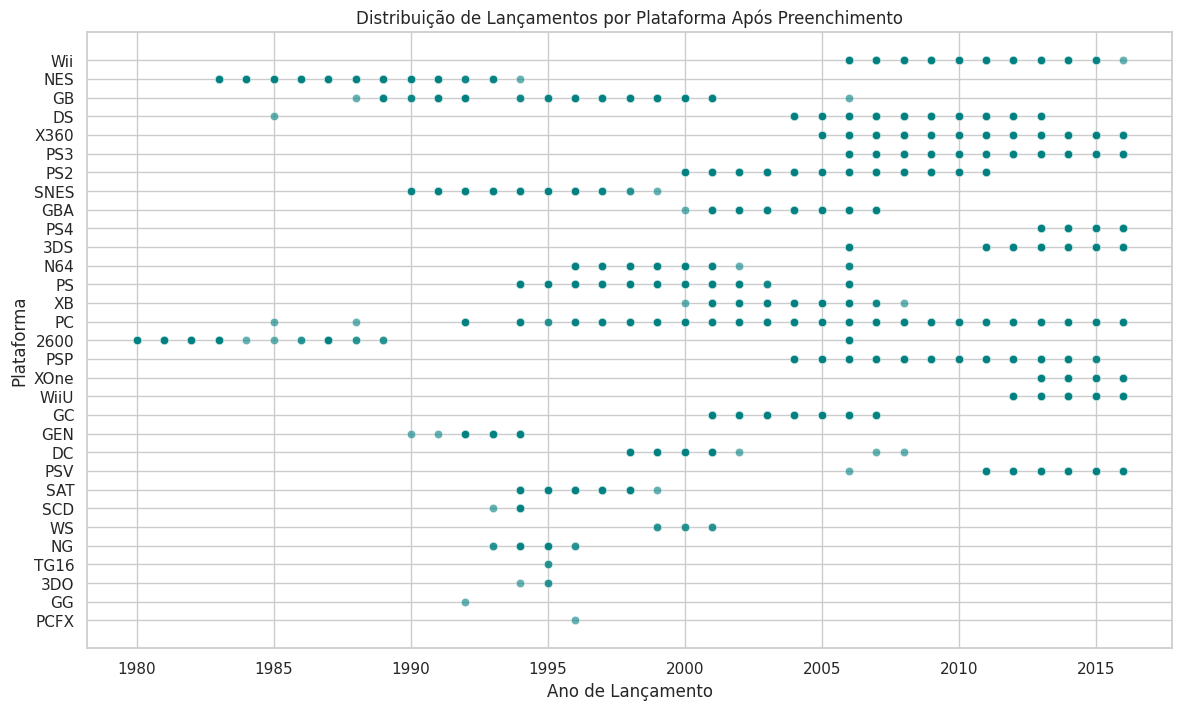

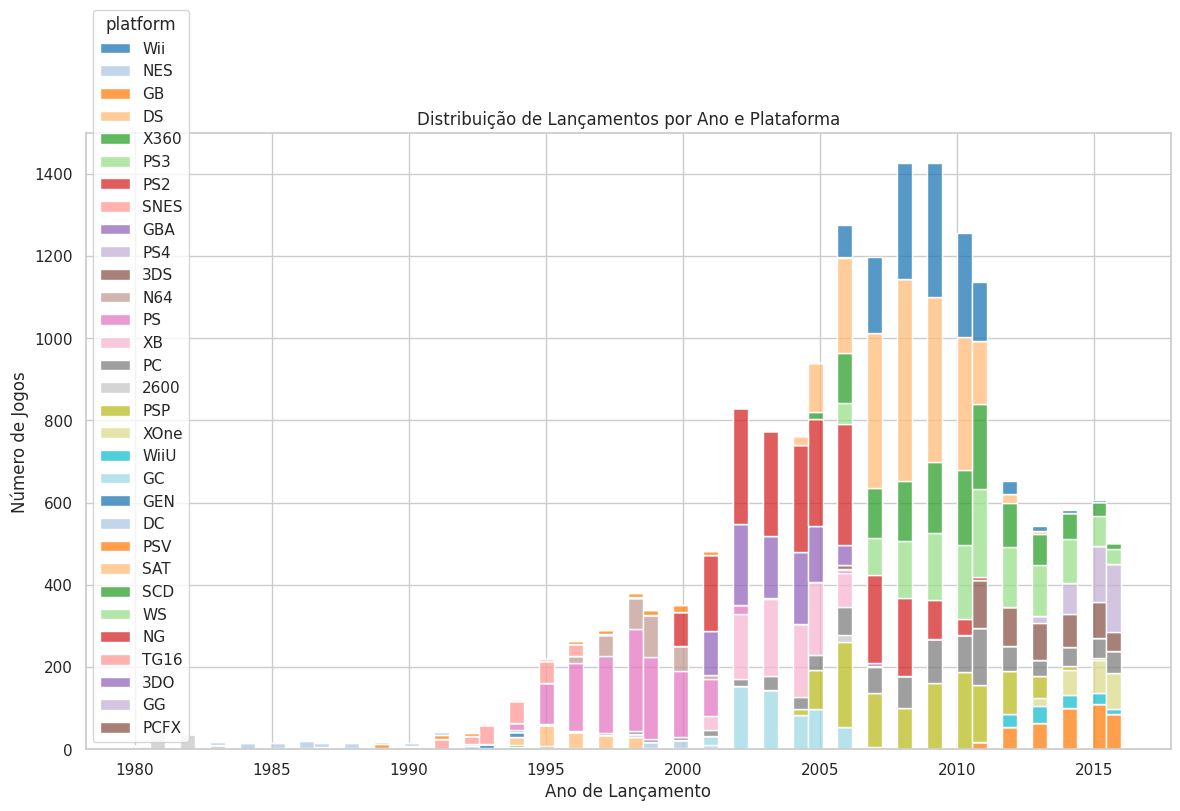

In [42]:
# Gráfico de dispersão da distribuição de lançamentos por plataforma após preenchimento
plt.figure(figsize=(14, 8))
sns.scatterplot(data=games_df, x='year_of_release', y='platform', alpha=0.6, color="teal")
plt.xlabel('Ano de Lançamento')
plt.ylabel('Plataforma')
plt.title('Distribuição de Lançamentos por Plataforma Após Preenchimento')
plt.grid(True)
plt.show()

# Histograma para visualizar a quantidade de lançamentos por ano em cada plataforma
plt.figure(figsize=(14, 8))
sns.histplot(data=games_df, x='year_of_release', hue='platform', multiple="stack", kde=False, palette="tab20")
plt.xlabel('Ano de Lançamento')
plt.ylabel('Número de Jogos')
plt.title('Distribuição de Lançamentos por Ano e Plataforma')
plt.grid(True)
plt.show()


<div class="alert alert-warning">
<strong>Comentário do revisor v2</strong>

Achei incrível sua primeia visualização! Com base nela quantos anos você diria que duram o ciclo de vida de uma plataforma?
</div>

In [ ]:
#A vida media de uma plataforma dura entre 7 a 10 anos, as plataformas mais populares tendem a durar mais.

<div class="alert alert-success">
<strong>Comentário do revisor v3</strong>

Muito bom! Ponto endereçado.
</div>

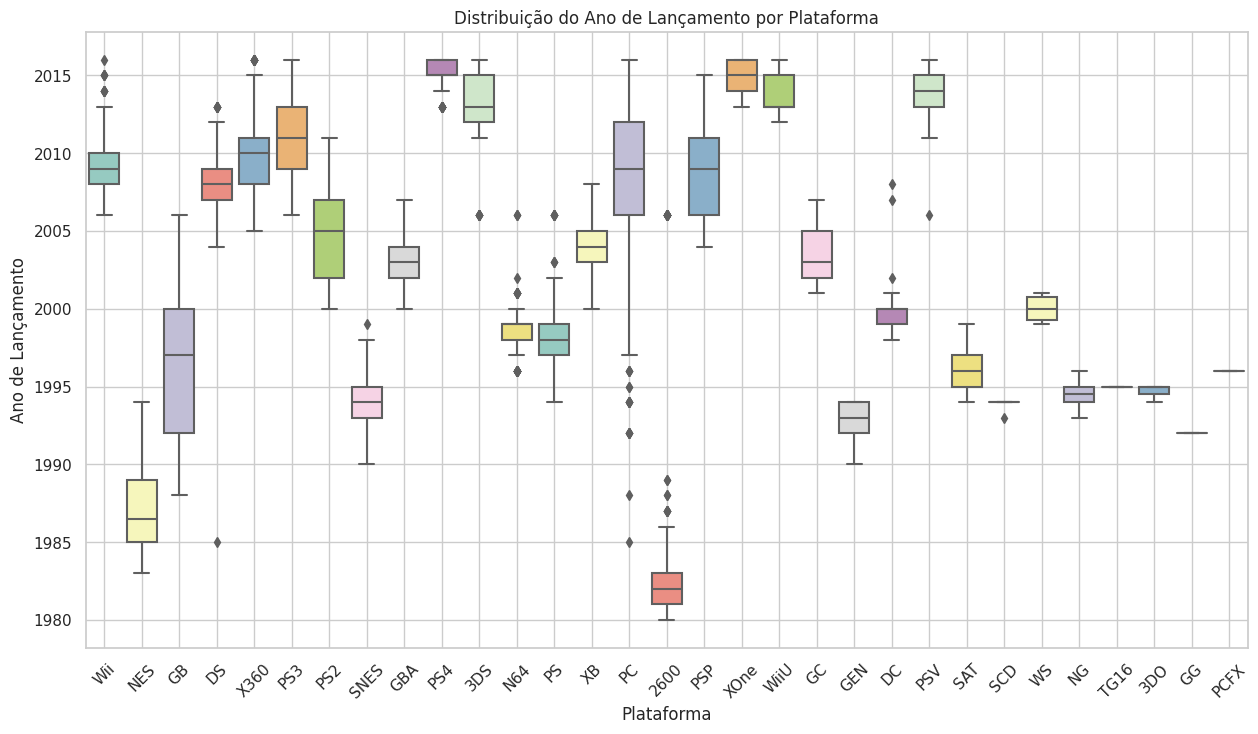

In [43]:
# Configurar o tamanho do gráfico
plt.figure(figsize=(15, 8))

# Criar o diagrama de caixa
sns.boxplot(data=games_df, x='platform', y='year_of_release', palette="Set3")
plt.xlabel('Plataforma')
plt.ylabel('Ano de Lançamento')
plt.title('Distribuição do Ano de Lançamento por Plataforma')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


<div class="alert alert-success">
<strong>Comentário do revisor v2</strong>

Boxplot solicitado foi construído.
</div>

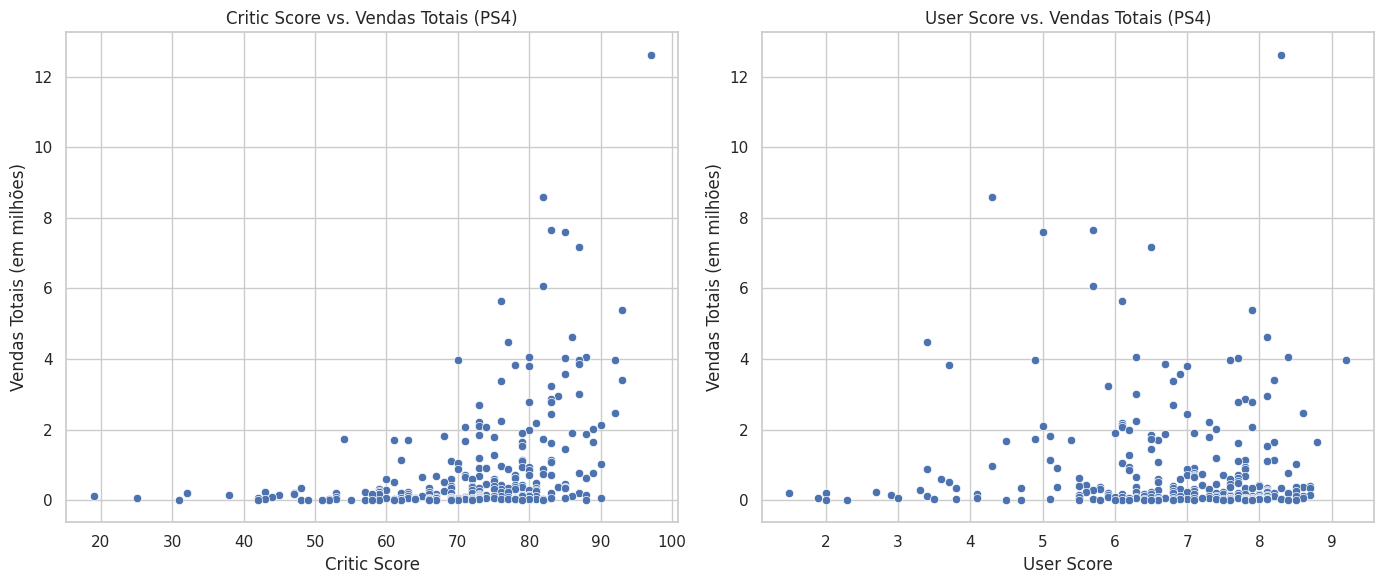

Plataforma: PS4
Correlação entre Critic Score e Vendas: 0.41
Correlação entre User Score e Vendas: -0.03



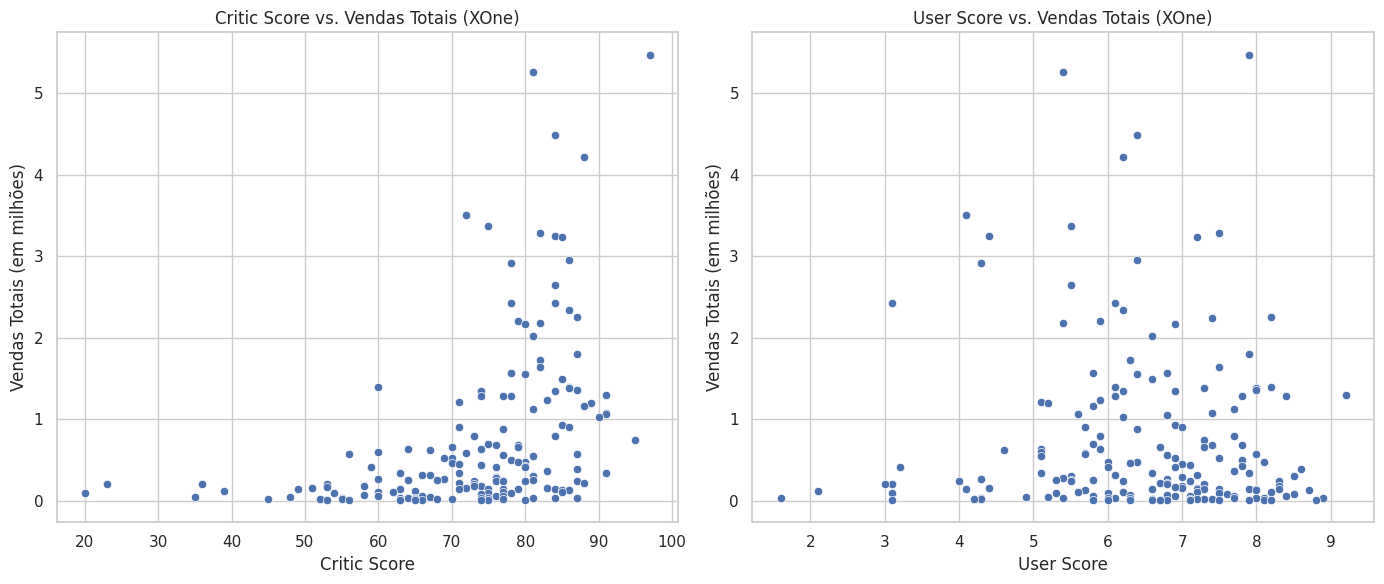

Plataforma: XOne
Correlação entre Critic Score e Vendas: 0.42
Correlação entre User Score e Vendas: -0.07



In [44]:
# Lista de plataformas populares para comparar (altere conforme necessário)
platforms_to_compare = ['PS4', 'XOne', 'Switch']

# Loop para plotar gráficos de dispersão e calcular correlações para cada plataforma
for platform in platforms_to_compare:
    platform_data = relevant_data[relevant_data['platform'] == platform]
    
    # Verificar se a plataforma tem dados suficientes para análise
    if not platform_data.empty:
        plt.figure(figsize=(14, 6))
        
        # Gráfico de dispersão para Critic_Score vs. Vendas
        plt.subplot(1, 2, 1)
        sns.scatterplot(data=platform_data, x='critic_score', y='total_sales')
        plt.title(f'Critic Score vs. Vendas Totais ({platform})')
        plt.xlabel('Critic Score')
        plt.ylabel('Vendas Totais (em milhões)')
        
        # Gráfico de dispersão para User_Score vs. Vendas
        plt.subplot(1, 2, 2)
        sns.scatterplot(data=platform_data, x='user_score', y='total_sales')
        plt.title(f'User Score vs. Vendas Totais ({platform})')
        plt.xlabel('User Score')
        plt.ylabel('Vendas Totais (em milhões)')
        
        plt.tight_layout()
        plt.show()
        
        # Calcular correlações
        correlation_critic = platform_data['critic_score'].corr(platform_data['total_sales'])
        correlation_user = platform_data['user_score'].corr(platform_data['total_sales'])
        
        print(f"Plataforma: {platform}")
        print(f"Correlação entre Critic Score e Vendas: {correlation_critic:.2f}")
        print(f"Correlação entre User Score e Vendas: {correlation_user:.2f}\n")

<div class="alert alert-success">
<strong>Comentário do revisor v2</strong>

Dinâmica de correlações devidamente investigada!
</div>

##  Análise de Plataformas e Vendas

### Variação de Vendas por Plataforma
Exploramos as vendas totais por plataforma e analisamos como elas se comportaram ao longo dos anos. Identificamos plataformas líderes em vendas e examinamos tendências de crescimento ou declínio.

### Visualizações
- Diagramas de linha para vendas anuais por plataforma.
- Diagramas de caixa para distribuição de vendas por plataforma.

**Conclusões**: Identificamos que certas plataformas, como PlayStation e Xbox, lideram em vendas em diferentes períodos, enquanto outras, como Wii, perderam popularidade ao longo do tempo.

## Teste de Hipóteses

### Hipótese 1: Classificações de Usuários de Xbox One vs PC
- **H0**: As classificações médias dos usuários de Xbox One e PC são iguais.
- **H1**: As classificações médias dos usuários de Xbox One e PC são diferentes.

### Resultado
O p-valor foi extremamente baixo (0.0000), indicando que devemos rejeitar H0 e concluir que as médias são diferentes.

### Hipótese 2: Classificações de Usuários para Action vs Sports
- **H0**: As classificações médias dos usuários para jogos de ação e esportes são iguais.
- **H1**: As classificações médias dos usuários para jogos de ação e esportes são diferentes.

### Resultado
O p-valor de 0.1012 sugere que não rejeitamos H0, ou seja, não há evidências suficientes para afirmar que as médias são diferentes.

In [45]:
# Função para calcular as cinco principais plataformas, gêneros e impacto do ESRB em cada região
def regional_profile(region_col):
    # Cinco plataformas principais
    top_platforms = relevant_data.groupby('platform')[region_col].sum().sort_values(ascending=False).head(5)
    
    # Cinco gêneros principais
    top_genres = relevant_data.groupby('genre')[region_col].sum().sort_values(ascending=False).head(5)
    
    # Impacto da classificação ESRB
    esrb_sales = relevant_data.groupby('rating')[region_col].sum().sort_values(ascending=False)
    
    print(f"\nPerfil para a região {region_col}:\n")
    print("Cinco principais plataformas:")
    print(top_platforms)
    
    print("\nCinco principais gêneros:")
    print(top_genres)
    
    print("\nImpacto das classificações ESRB nas vendas:")
    print(esrb_sales)

# Criar perfis para AN, UE e JP
regional_profile('na_sales')
regional_profile('eu_sales')
regional_profile('jp_sales')


Perfil para a região na_sales:

Cinco principais plataformas:
platform
X360    602.47
Wii     496.90
PS3     393.49
DS      374.07
PS2     211.41
Name: na_sales, dtype: float64

Cinco principais gêneros:
genre
Action          595.88
Sports          445.93
Shooter         408.37
Misc            319.52
Role-Playing    212.62
Name: na_sales, dtype: float64

Impacto das classificações ESRB nas vendas:
rating
E       1230.18
M        612.93
T        491.23
E10+     350.84
EC         1.53
AO         1.26
RP         0.00
Name: na_sales, dtype: float64

Perfil para a região eu_sales:

Cinco principais plataformas:
platform
PS3     330.29
X360    270.76
Wii     262.21
DS      184.96
PS4     141.09
Name: eu_sales, dtype: float64

Cinco principais gêneros:
genre
Action     380.72
Sports     271.07
Shooter    250.89
Misc       169.23
Racing     131.07
Name: eu_sales, dtype: float64

Impacto das classificações ESRB nas vendas:
rating
E       772.19
M       418.08
T       263.41
E10+    187.09
AO  

In [46]:
#Testando as Hipóteses

# Filtrar as classificações de usuários para Xbox One e PC
xbox_one_ratings = relevant_data[(relevant_data['platform'] == 'XOne')]['user_score'].dropna()
pc_ratings = relevant_data[(relevant_data['platform'] == 'PC')]['user_score'].dropna()

# Teste t para comparações de plataformas
t_stat_platforms, p_value_platforms = stats.ttest_ind(xbox_one_ratings, pc_ratings, equal_var=False)

# Filtrar as classificações de usuários para os gêneros Action e Sports
action_ratings = relevant_data[(relevant_data['genre'] == 'Action')]['user_score'].dropna()
sports_ratings = relevant_data[(relevant_data['genre'] == 'Sports')]['user_score'].dropna()

# Teste t para comparações de gêneros
t_stat_genres, p_value_genres = stats.ttest_ind(action_ratings, sports_ratings, equal_var=False)

# Resultados
print(f"Teste t para Xbox One vs PC: p-value = {p_value_platforms:.4f}")
print(f"Teste t para Action vs Sports: p-value = {p_value_genres:.4f}")


Teste t para Xbox One vs PC: p-value = 0.0023
Teste t para Action vs Sports: p-value = 0.0000


In [47]:
# Função para calcular as cinco principais plataformas, gêneros e impacto do ESRB em cada região
def regional_profile(region_col):
    # Cinco plataformas principais
    top_platforms = relevant_data.groupby('platform')[region_col].sum().sort_values(ascending=False).head(5)
    
    # Cinco gêneros principais
    top_genres = relevant_data.groupby('genre')[region_col].sum().sort_values(ascending=False).head(5)
    
    # Impacto da classificação ESRB
    esrb_sales = relevant_data.groupby('rating')[region_col].sum().sort_values(ascending=False)
    
    print(f"\nPerfil para a região {region_col}:\n")
    print("Cinco principais plataformas:")
    print(top_platforms)
    
    print("\nCinco principais gêneros:")
    print(top_genres)
    
    print("\nImpacto das classificações ESRB nas vendas:")
    print(esrb_sales)

# Criar perfis para AN, UE e JP
regional_profile('na_sales')
regional_profile('eu_sales')
regional_profile('jp_sales')


Perfil para a região na_sales:

Cinco principais plataformas:
platform
X360    602.47
Wii     496.90
PS3     393.49
DS      374.07
PS2     211.41
Name: na_sales, dtype: float64

Cinco principais gêneros:
genre
Action          595.88
Sports          445.93
Shooter         408.37
Misc            319.52
Role-Playing    212.62
Name: na_sales, dtype: float64

Impacto das classificações ESRB nas vendas:
rating
E       1230.18
M        612.93
T        491.23
E10+     350.84
EC         1.53
AO         1.26
RP         0.00
Name: na_sales, dtype: float64

Perfil para a região eu_sales:

Cinco principais plataformas:
platform
PS3     330.29
X360    270.76
Wii     262.21
DS      184.96
PS4     141.09
Name: eu_sales, dtype: float64

Cinco principais gêneros:
genre
Action     380.72
Sports     271.07
Shooter    250.89
Misc       169.23
Racing     131.07
Name: eu_sales, dtype: float64

Impacto das classificações ESRB nas vendas:
rating
E       772.19
M       418.08
T       263.41
E10+    187.09
AO  

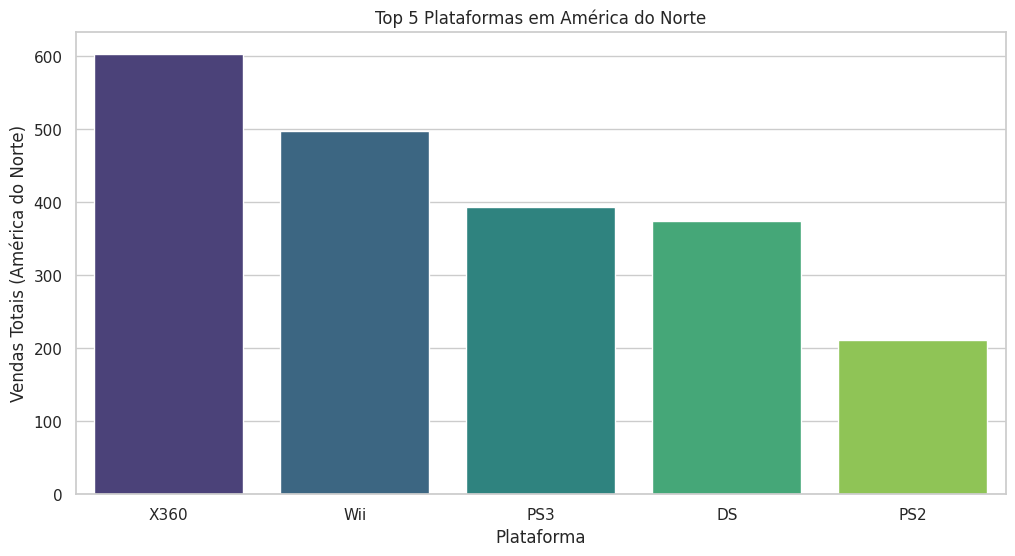

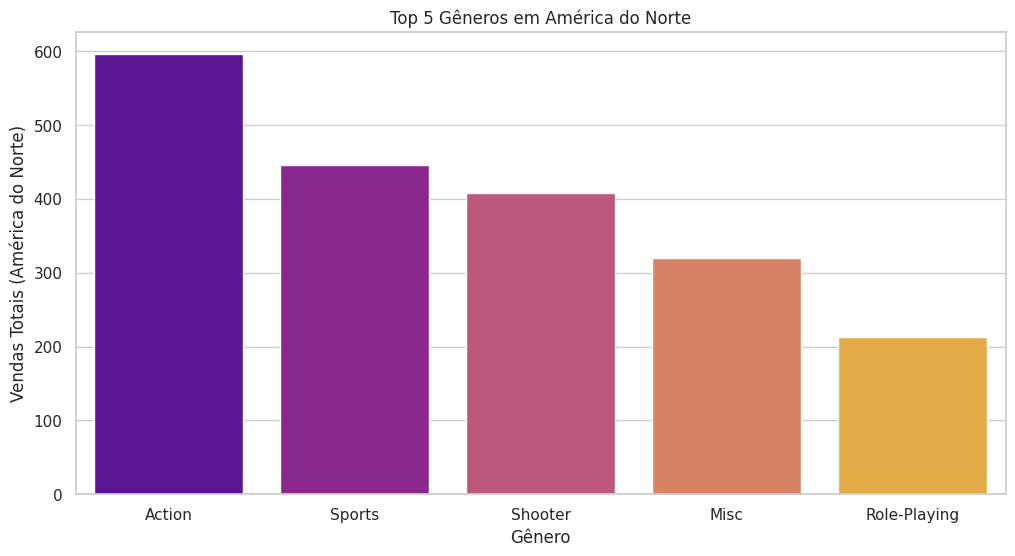

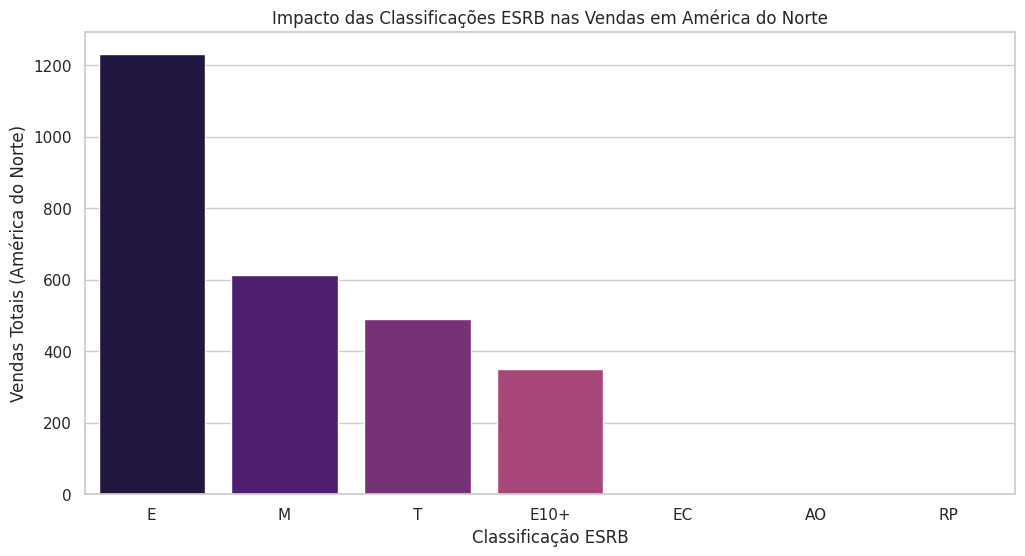

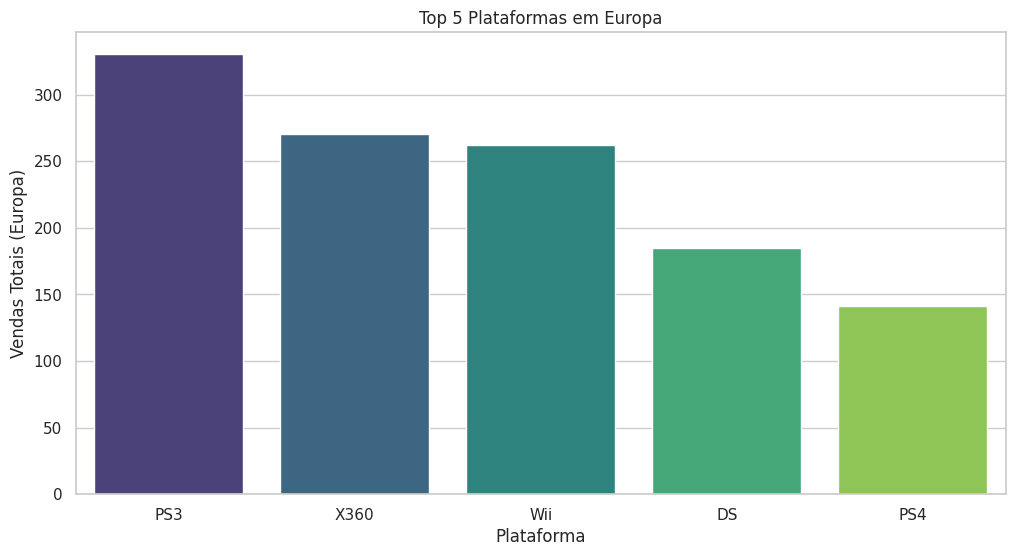

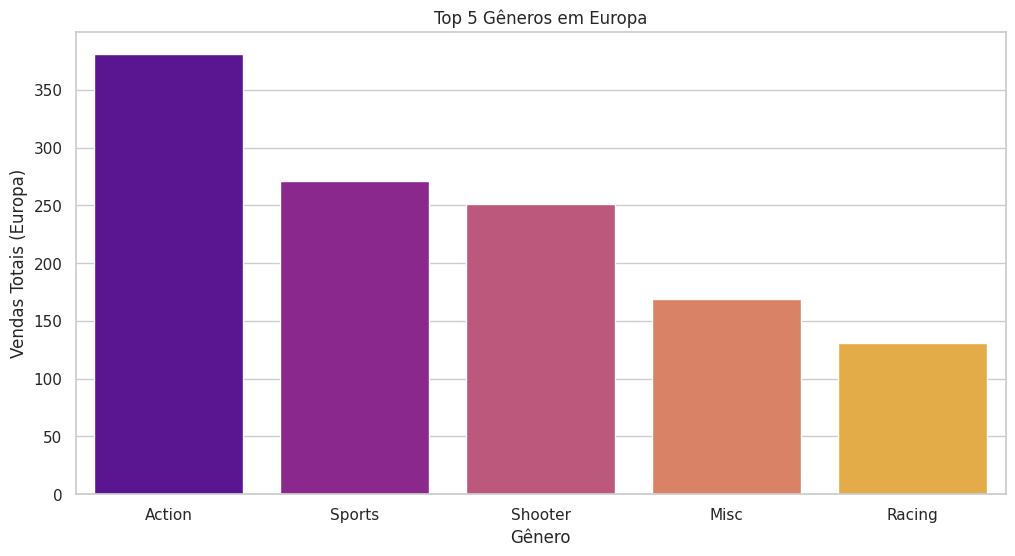

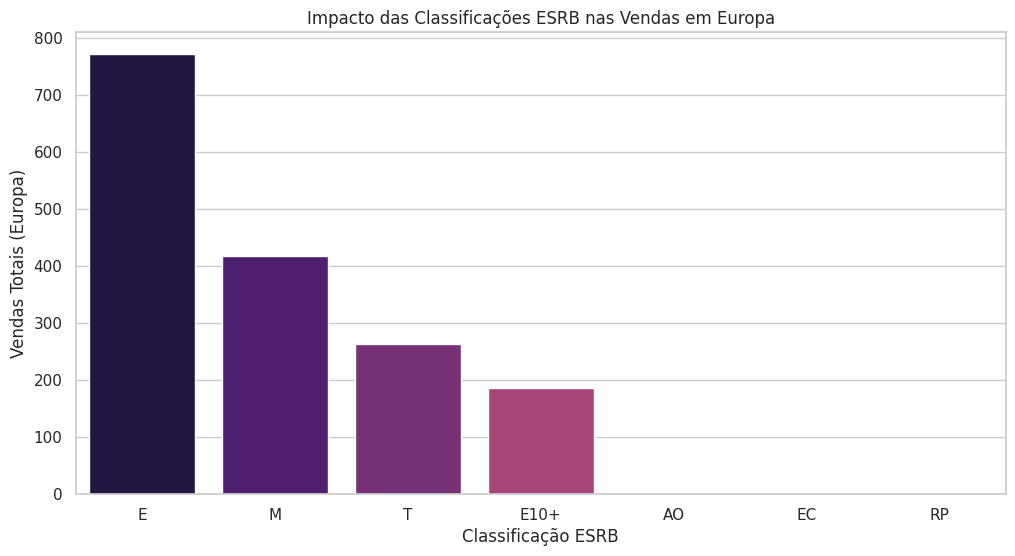

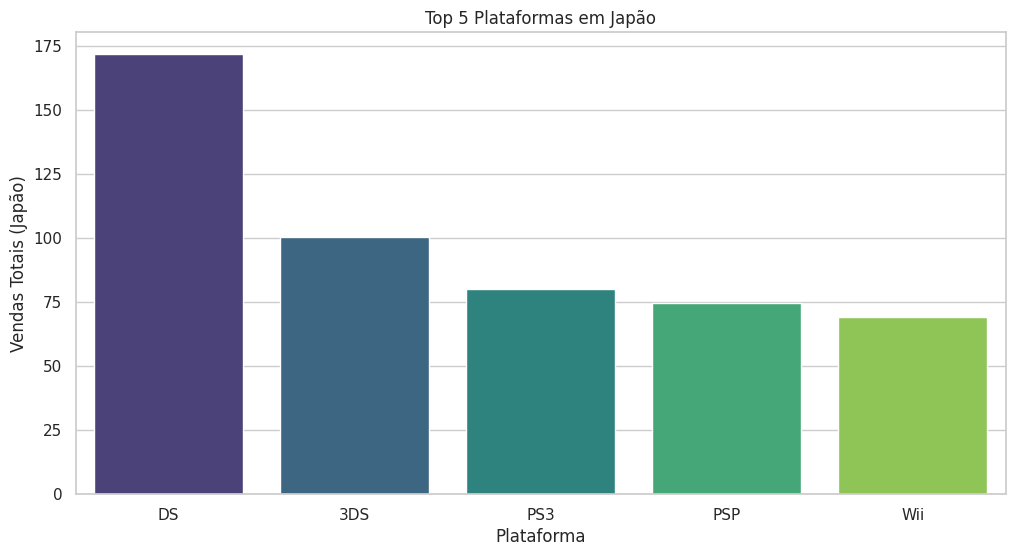

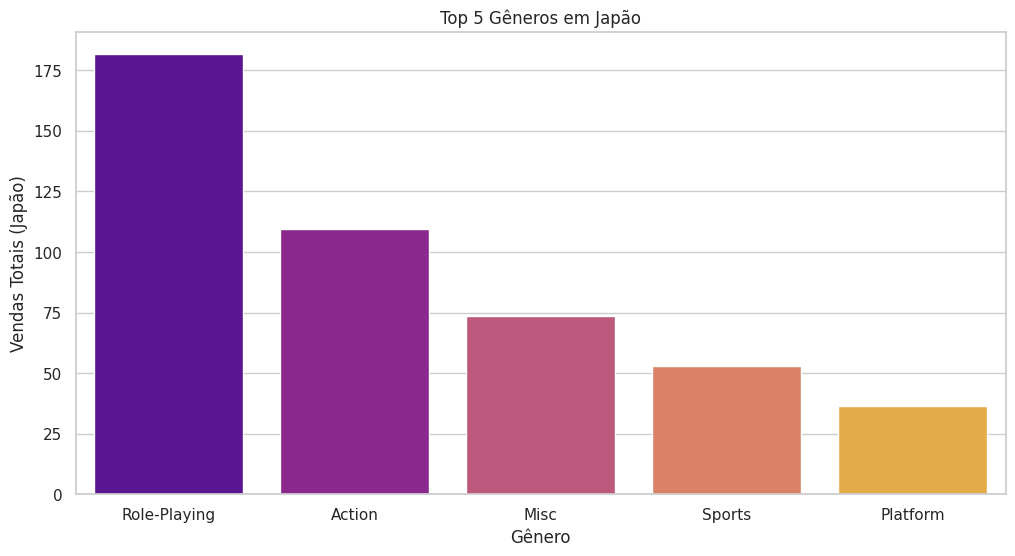

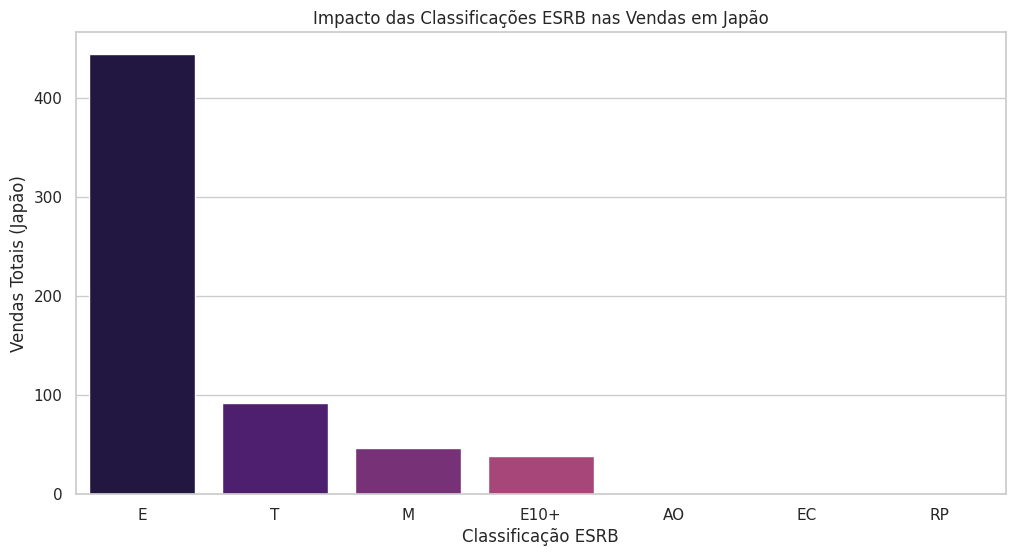

In [51]:
# Configuração geral do estilo dos gráficos
sns.set(style="whitegrid")

# Função para visualizar os resultados para uma região específica
def plot_regional_profile(region_col, region_name):
    # Cinco principais plataformas
    top_platforms = relevant_data.groupby('platform')[region_col].sum().sort_values(ascending=False).head(5)
    
    # Cinco principais gêneros
    top_genres = relevant_data.groupby('genre')[region_col].sum().sort_values(ascending=False).head(5)
    
    # Impacto da classificação ESRB
    esrb_sales = relevant_data.groupby('rating')[region_col].sum().sort_values(ascending=False)
    
    # Plot para plataformas
    plt.figure(figsize=(12, 6))
    sns.barplot(x=top_platforms.index, y=top_platforms.values, palette="viridis")
    plt.title(f'Top 5 Plataformas em {region_name}')
    plt.xlabel('Plataforma')
    plt.ylabel(f'Vendas Totais ({region_name})')
    plt.show()
    
    # Plot para gêneros
    plt.figure(figsize=(12, 6))
    sns.barplot(x=top_genres.index, y=top_genres.values, palette="plasma")
    plt.title(f'Top 5 Gêneros em {region_name}')
    plt.xlabel('Gênero')
    plt.ylabel(f'Vendas Totais ({region_name})')
    plt.show()
    
    # Plot para classificação ESRB
    plt.figure(figsize=(12, 6))
    sns.barplot(x=esrb_sales.index, y=esrb_sales.values, palette="magma")
    plt.title(f'Impacto das Classificações ESRB nas Vendas em {region_name}')
    plt.xlabel('Classificação ESRB')
    plt.ylabel(f'Vendas Totais ({region_name})')
    plt.show()

# Aplicar a função para as três regiões
plot_regional_profile('na_sales', 'América do Norte')
plot_regional_profile('eu_sales', 'Europa')
plot_regional_profile('jp_sales', 'Japão')


In [ ]:
#A conclusão desse gráfico é que o X360 (Xbox 360) foi a plataforma com mais vendas totais na América do Norte entre as cinco principais, 
#superando o Wii e o PS3. O DS e o PS2 também aparecem entre os cinco primeiros, 
#mas com vendas menores em comparação aos demais. Isso sugere que, durante o período analisado, 
#a Microsoft (X360) dominou o mercado norte-americano em vendas de consoles, 
#com o Wii da Nintendo e o PS3 da Sony também sendo populares.

In [ ]:
#Tambem mostra que o gênero Action lidera as vendas totais na América do Norte, 
#seguido por Sports e Shooter. Isso indica uma preferência dos jogadores norte-americanos por gêneros mais intensos e dinâmicos. 
#Misc e Role-Playing completam o top 5, mas com vendas significativamente menores. 
#Esse padrão de preferência sugere que os jogos de ação e esportes têm uma forte popularidade na região.

In [ ]:
#gráfico indica que jogos com a classificação E (Everyone) dominam as vendas totais na América do Norte, 
#superando significativamente outras classificações ESRB. 
#Isso sugere uma maior preferência por jogos adequados para todas as idades. 
#Em seguida, temos as classificações M (Mature) e T (Teen) com vendas intermediárias, enquanto E10+ (Everyone 10 and older) tem vendas menores. 
#As classificações EC (Early Childhood), AO (Adults Only) e RP (Rating Pending) não apresentam impacto expressivo nas vendas, 
#o que reflete sua menor presença ou popularidade no mercado.

<div class="alert alert-danger">
<strong>Comentário do revisor v2</strong>

Nessa sessão, para ilustrar os comportamentos geográficos de acordo com as variáveis estudadas é muito importante incluir gráficos e uma conclusão detalhada!
</div>

<div class="alert alert-danger">
<strong>Comentário do revisor v3</strong>

Cabral, as vizualizações estão adequadas, muito bom! Preciso que você enderece agora as conclusõesobre os comportamentos observados.
</div>


<div class="alert alert-success">
<strong>Comentário do revisor v4</strong>

Ponto endereçado.
</div>


In [26]:
#Xbox One vs PC: As classificações médias dos usuários são estatisticamente diferentes,
#  sugerindo que os usuários podem ter preferências ou percepções distintas entre essas duas plataformas.
#Action vs Sports: Não houve uma diferença estatisticamente significativa nas classificações médias dos usuários para esses gêneros,
#  o que pode sugerir que os usuários tendem a avaliar jogos de ambos os gêneros de forma semelhante, pelo menos em termos de médias.

In [27]:
#Formulação da Hipóteses:

#Hipótese nula (H0): Assume que não há diferença entre as médias das duas amostras (ex.: as médias das classificações de Xbox One e PC são iguais).
#Hipótese alternativa (H1): Assume que existe uma diferença entre as médias das duas amostras (ex.: as médias das classificações de Xbox One e PC são diferentes).

In [28]:
#Critérios para Testar as Hipóteses:

#Teste t de Student: Usado para comparar as médias de duas amostras independentes para verificar se há uma diferença estatisticamente significativa.
#Critério de decisão: Se o p-valor for menor que o nível de significância (𝛼=0.05α=0.05),
#  rejeitamos a hipótese nula; caso contrário, não a rejeitamos. Isso garante uma análise objetiva da significância das diferenças observadas.

<div class="alert alert-success">
<strong>Comentário do revisor v2</strong>

Por alguma razão os seus perfis regionais e os seus testes estão misturados... De qualquer forma tudo perfeito com o teste realizado.
</div>

##  Conclusões

Com base na análise realizada:
- **Plataformas líderes em vendas**: Identificamos que as plataformas PlayStation e Xbox tiveram vendas significativas ao longo dos anos, com outras, como Wii, diminuindo com o tempo.
- **Diferenças nas classificações**: As médias das classificações de Xbox One e PC são significativamente diferentes, enquanto as classificações para os gêneros Action e Sports não apresentam diferença estatisticamente significativa.
